<a href="https://colab.research.google.com/github/Daniel0507-2001/Procesamiento-digital-de-se-ales/blob/main/PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

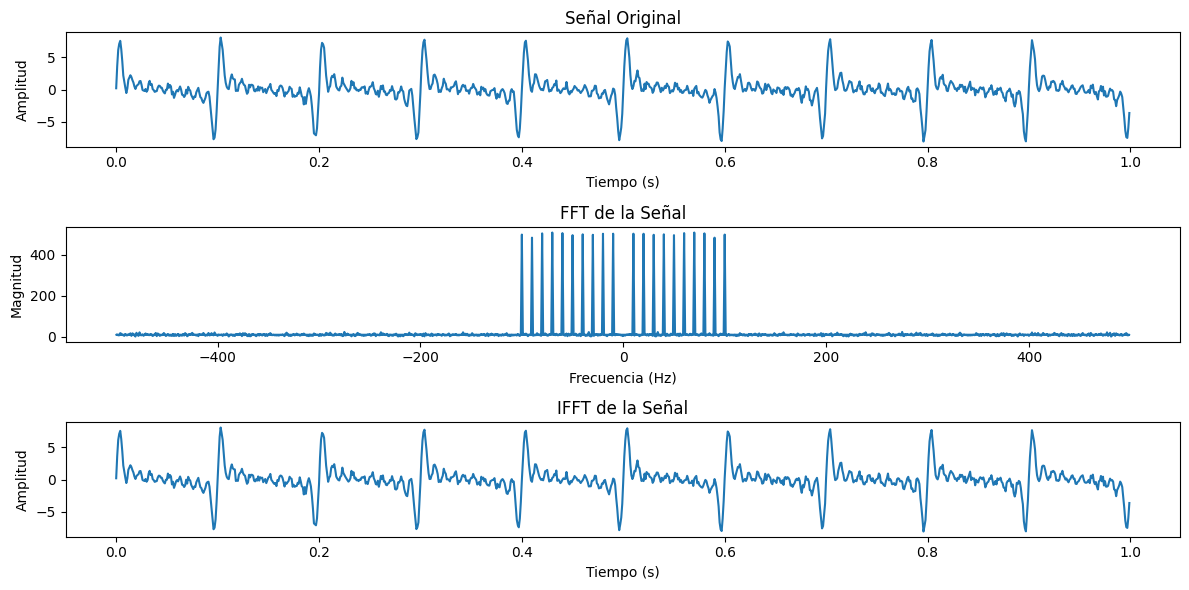

In [ ]:
# prompt: generar una señal de 10 señales sen a frecuencias de (10, 20 30, 40,50,60,70, 80, 90, 100)respectivamente + ruido blaco gauiciano de 0.3
# + signal FFT
# + w IFFT
# cortar armonicos de W= W_F
# w_f= IFFT=signal FILtrada

import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
duration = 1  # Duración de la señal en segundos
t = np.arange(0, duration, 1/fs)  # Vector de tiempo
frequencies = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Frecuencias de las señales senoidales
noise_level = 0.3  # Nivel de ruido

# Generar las señales senoidales y agregar ruido
signal = np.zeros_like(t)
for f in frequencies:
  signal += np.sin(2 * np.pi * f * t)

noise = np.random.normal(0, noise_level, len(t))
signal += noise

# Calcular la FFT de la señal
fft_signal = np.fft.fft(signal)
frequencies_fft = np.fft.fftfreq(len(signal), 1/fs)

# Filtrar la señal en el dominio de la frecuencia
# (Eliminar componentes de frecuencia mayores a un umbral)
cutoff_frequency = 70  # Frecuencia de corte
filtered_fft = np.copy(fft_signal)
filtered_fft[(np.abs(frequencies_fft) > cutoff_frequency)] = 0

# Calcular la IFFT de la señal filtrada
filtered_signal = np.fft.ifft(filtered_fft)

# Graficar las señales
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Señal original con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(frequencies_fft, np.abs(fft_signal))
plt.title('FFT de la señal original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

plt.subplot(3, 1, 3)
plt.plot(t, np.real(filtered_signal))
plt.title('Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

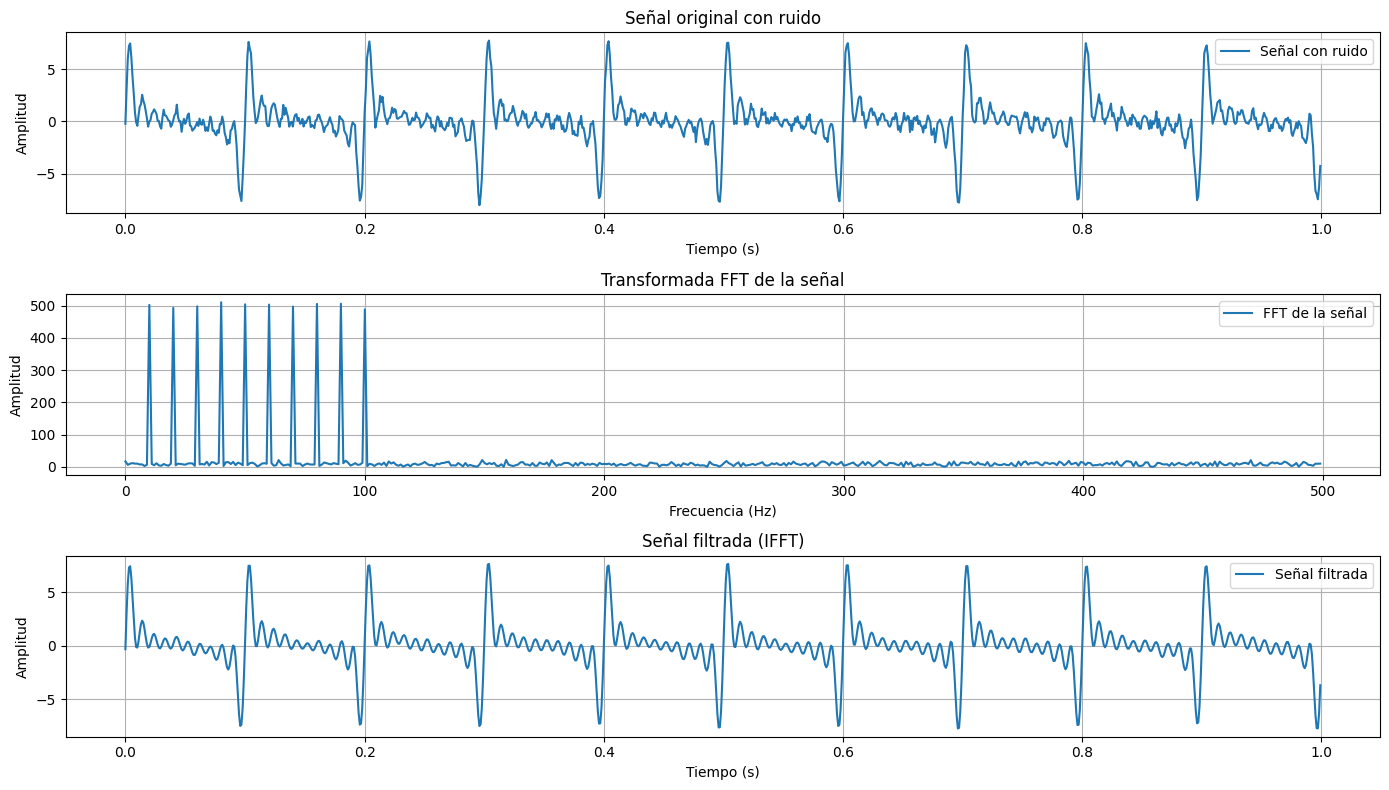

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Tiempo de 0 a 1 segundo
frecuencias = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Frecuencias en Hz
ruido_amplitud = 0.3

# Generación de la señal
señal = sum(np.sin(2 * np.pi * f * t) for f in frecuencias)
ruido = ruido_amplitud * np.random.normal(size=fs)
señal_con_ruido = señal + ruido

# FFT de la señal
fft_señal = fft(señal_con_ruido)
frecuencias_fft = np.fft.fftfreq(len(fft_señal), 1/fs)

# Filtrado: cortar armónicos fuera de los rangos deseados (conservar solo frecuencias definidas)
fft_filtrada = fft_señal.copy()
fft_filtrada[np.abs(frecuencias_fft) > max(frecuencias)] = 0

# IFFT para obtener la señal filtrada
señal_filtrada = ifft(fft_filtrada).real

# Gráficas
plt.figure(figsize=(14, 8))

# Señal original con ruido
plt.subplot(3, 1, 1)
plt.plot(t, señal_con_ruido, label="Señal con ruido")
plt.title("Señal original con ruido")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# FFT de la señal
plt.subplot(3, 1, 2)
plt.plot(frecuencias_fft[:fs//2], np.abs(fft_señal[:fs//2]), label="FFT de la señal")
plt.title("Transformada FFT de la señal")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Señal filtrada
plt.subplot(3, 1, 3)
plt.plot(t, señal_filtrada, label="Señal filtrada")
plt.title("Señal filtrada (IFFT)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
